In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Read the dataset to the python environment**

In [3]:
df = pd.read_csv("/content/Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# **2. Try out different clustering models in the wine dataset.**




In [6]:
df = pd.read_csv("/content/Wine.csv",index_col=0)
df.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,,,,,,,,,,,,
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##To normalize

In [7]:
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(df), columns=df.columns, index = df.index)

In [8]:
data.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,,,,,,,,,,,,
14.23,0.001594,0.002265,0.014543,0.118393,0.002610,0.002853,0.000261,0.002135,0.005258,0.000970,0.003654,0.992825
13.20,0.001687,0.002029,0.010618,0.094801,0.002512,0.002617,0.000246,0.001213,0.004152,0.000995,0.003223,0.995414
13.16,0.001984,0.002245,0.015637,0.084911,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996237
14.37,0.001314,0.001684,0.011317,0.076123,0.002594,0.002351,0.000162,0.001469,0.005255,0.000579,0.002324,0.997008
13.24,0.003478,0.003854,0.028197,0.158443,0.003760,0.003612,0.000524,0.002444,0.005801,0.001396,0.003934,0.986909


In [9]:
data.describe()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.003712,0.003645,0.031134,0.151583,0.003445,0.002974,0.000581,0.002397,0.007344,0.001478,0.003995,0.986239
std,0.002500,0.001410,0.014680,0.054122,0.001544,0.001803,0.000327,0.001250,0.003844,0.000736,0.001980,0.009927
min,0.000944,0.001473,0.007740,0.064149,0.001255,0.000637,0.000145,0.000554,0.002242,0.000579,0.001675,0.952371
25%,0.001684,0.002359,0.017616,0.109786,0.002386,0.001747,0.000277,0.001515,0.004613,0.000970,0.002536,0.981992
50%,0.003175,0.003469,0.030042,0.146806,0.002947,0.002721,0.000514,0.002030,0.005983,0.001232,0.003384,0.988656
75%,0.004983,0.004507,0.040020,0.183140,0.003887,0.003551,0.000833,0.003041,0.008858,0.001835,0.004871,0.993651
max,0.014860,0.007311,0.069740,0.298133,0.008408,0.010563,0.002010,0.007473,0.021883,0.004731,0.010867,0.997870


In [10]:
data.shape

(178, 12)

##**1. KMeans Clustering**

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data)
x_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2']) 
x_pca.head()

,PC1,PC2
0,-0.036895,0.008291
1,-0.060850,0.006494
2,-0.069230,-0.000781
3,-0.078814,0.001330
4,0.005722,0.004555


In [56]:
pca.explained_variance_

array([3.20957506e-03, 4.20065648e-05])

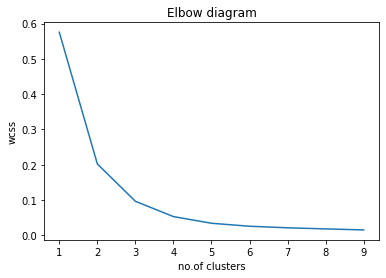

In [57]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(x_pca)
  wcss.append(model.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow diagram')
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.show()

**The optimum number of clusters is 3**

In [58]:
model = KMeans(n_clusters=3)
model.fit(x_pca)
label_pred = model.predict(x_pca)
label_pred

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

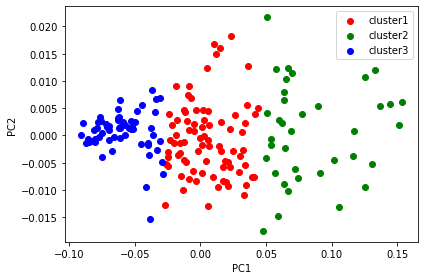

In [59]:
x = x_pca.values
plt.scatter(x[label_pred==0, 0], x[label_pred==0, 1], c='red', label='cluster1')
plt.scatter(x[label_pred==1, 0], x[label_pred==1, 1], c='green', label='cluster2')
plt.scatter(x[label_pred==2, 0], x[label_pred==2, 1], c='blue', label='cluster3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()

# **2. Agglomerative Clustering**

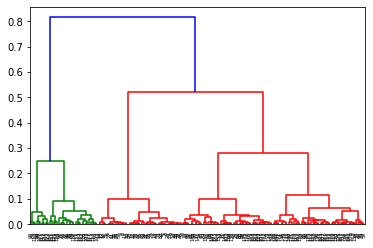

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(x_pca, method='ward')
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(15, 0, 5000, linestyles='dashed')
plt.show()

**Optimum no of cluster is 3**

In [61]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label_pred_ac = ac.fit_predict(x_pca)
label_pred_ac

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

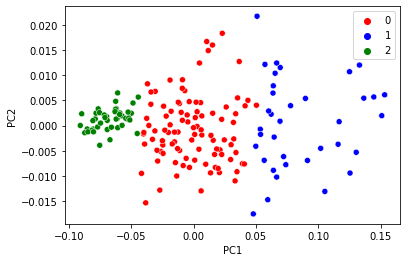

In [62]:
sns.scatterplot(x='PC1', y='PC2', data=x_pca, hue=label_pred_ac, palette=['red', 'blue', 'green'])
plt.show()

# **3. Find the optimum number of clusters in each model and create the model with**
# **the optimum number of clusters .**

In [63]:
data['Label'] = label_pred_ac
data[data['Label']==0]

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
Alcohol,,,,,,,,,,,,,
14.23,0.001594,0.002265,0.014543,0.118393,0.002610,0.002853,0.000261,0.002135,0.005258,0.000970,0.003654,0.992825,0
13.24,0.003478,0.003854,0.028197,0.158443,0.003760,0.003612,0.000524,0.002444,0.005801,0.001396,0.003934,0.986909,0
13.64,0.003634,0.003001,0.017817,0.135974,0.003165,0.003552,0.000199,0.001946,0.005978,0.001125,0.003939,0.990501,0
14.06,0.002062,0.002885,0.020245,0.159429,0.003796,0.004011,0.000304,0.002657,0.007149,0.001379,0.004694,0.986938,0
12.93,0.004891,0.003411,0.023938,0.131275,0.003102,0.003102,0.000322,0.002548,0.005792,0.001326,0.004530,0.990998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.71,0.007569,0.003282,0.027464,0.127273,0.002251,0.000817,0.000697,0.001420,0.010316,0.000857,0.002331,0.991392,0
13.40,0.005163,0.003275,0.030371,0.134687,0.002377,0.000990,0.000568,0.001862,0.009639,0.000924,0.002060,0.990349,0
13.27,0.005072,0.002678,0.023700,0.142198,0.001884,0.000818,0.000510,0.001600,0.012087,0.000699,0.001849,0.989459,0


In [64]:
data[data['Label']==1]

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
Alcohol,,,,,,,,,,,,,
12.64,0.002948,0.004379,0.036416,0.216761,0.004379,0.003056,0.001149,0.001344,0.012464,0.002124,0.003447,0.975427,1
12.37,0.002632,0.005030,0.044247,0.202605,0.008151,0.007219,0.000442,0.004355,0.010363,0.002841,0.006684,0.978092,1
12.17,0.003914,0.006830,0.051289,0.280739,0.005102,0.004724,0.001215,0.002780,0.007963,0.003914,0.006020,0.958291,1
12.21,0.001621,0.002384,0.022891,0.205744,0.002521,0.001744,0.000191,0.003406,0.003883,0.001744,0.004183,0.978305,1
13.86,0.003598,0.006361,0.059562,0.204893,0.007028,0.006814,0.000500,0.004455,0.008053,0.003240,0.007529,0.976816,1
11.66,0.004281,0.004372,0.036431,0.220864,0.003666,0.003575,0.000774,0.002618,0.008652,0.002801,0.004873,0.974533,1
13.03,0.002241,0.004257,0.039831,0.214093,0.004854,0.005054,0.000597,0.003635,0.011451,0.002962,0.006174,0.975866,1
11.84,0.005636,0.004349,0.035106,0.218435,0.003355,0.002574,0.000839,0.001853,0.005168,0.001872,0.004915,0.975155,1
12.70,0.008156,0.005058,0.048471,0.212853,0.005964,0.005374,0.000906,0.004110,0.005416,0.002508,0.006596,0.975751,1


In [65]:
data[data['Label']==2]

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
Alcohol,,,,,,,,,,,,,
13.20,0.001687,0.002029,0.010618,0.094801,0.002512,0.002617,0.000246,0.001213,0.004152,0.000995,0.003223,0.995414,2
13.16,0.001984,0.002245,0.015637,0.084911,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996237,2
14.37,0.001314,0.001684,0.011317,0.076123,0.002594,0.002351,0.000162,0.001469,0.005255,0.000579,0.002324,0.997008,2
14.20,0.001210,0.001685,0.010451,0.077006,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001960,0.996954,2
14.39,0.001445,0.001894,0.011286,0.074207,0.001932,0.001948,0.000232,0.001531,0.004058,0.000788,0.002767,0.997159,2
14.06,0.001653,0.002006,0.013530,0.093021,0.001999,0.001930,0.000238,0.000961,0.003882,0.000815,0.002752,0.995553,2
14.83,0.001562,0.002067,0.013338,0.092415,0.002668,0.002839,0.000276,0.001886,0.004954,0.001029,0.002715,0.995602,2
13.86,0.001286,0.002162,0.015242,0.093355,0.002839,0.003001,0.000210,0.001762,0.006878,0.000962,0.003382,0.995473,2
14.10,0.001427,0.001519,0.011891,0.069363,0.001949,0.002193,0.000145,0.001572,0.003798,0.000826,0.002094,0.997503,2
